# Titanic Machine Learning from Disaster

The Titanic challenge on Kaggle is one of the "Hello World" challenges in Machine Learning. In my very first blog post I will share my first attempt at the Titanic Kaggle challenge.
While working through Machine Learning projects, I will follow a slightly adjusted Machine Learning project check list from Aurelien Geron's book "Hands-On Machine Learning with Scikit_Learn, Keras & TensorFlow". (Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow (p. 35). O'Reilly Media. Kindle Edition.)

1.	Look at the big picture
2.	Get the data
3.	Discover and visualize the data to gain insights
4.	Prepare the data for Machine Learning algorithms
5.	Select, train and fine-tune models
6.	Conclusion

As with all coding posts, the full jupyter notebook can be found in my github repo below:

<https://github.com/John-Land/Projects/tree/main/Kaggle/Titanic>

## 1. Look at the big picture

The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912 during its first voyage, the ship which was considered "unsinkable" sank after colliding with an iceberg. There were unfortunately not enough lifeboats for everyone, and 1502 out of the 2224 passengers and crew died.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others. In this Kaggle challenge, the question is whether we can find patterns in the data to answer the question: 

What kind of passengers were more likely to survive? 
In other words, given data on the passengers, can we predict if a given passenger is more likely to survive or not survive?

## 2. Get the data

The data is provided on the Kaggle challenge page. <https://www.kaggle.com/c/titanic/data>

We will first import the data and check for any missing values and some basic information.

In [1]:
# linear algebra library
import numpy as np     

# data processing library
import pandas as pd    

#data visualization
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme()

In [2]:
# import training data
training_data = pd.read_csv("train.csv")

# import testing data
testing_data = pd.read_csv("test.csv") 

training_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### 2.1. Data Structure

In [3]:
training_data.shape, testing_data.shape

((891, 12), (418, 11))

Training data: 891 rows and 12 columns -> Data on 891 passengers, and 11 features per passenger (excluding the "Survived" variable).


Testing data: 418 rows and 11 columns (excluding "Survived" variable to be predicted).


There are also several categorical variables such as Sex and Embarked, which if used later for prediction, will first have to be converted into numerical dummy variables.

In [4]:
print("Training Data missing values:"), training_data.isna().sum()

Training Data missing values:


(None,
 PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64)

In [5]:
print("Testing Data missing values:"), testing_data.isna().sum()

Testing Data missing values:


(None,
 PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64)

Training data: 3 features with missing values.
Cabin is missing 687 values, Age 177 values and Embarked 2 values.

Testing data: Cabin is missing 327 values, Age 86 values and Fare is missing 1 value.

Later the missing values either have to be imputed or removed prior to running the Machine Learning Algorithms.

## 3. Discover and visualize the data to gain insights

In the next chapter we will take a deeper look at the individual features, and try to find patters which link to the survival probability.

Thankfully Kaggle has provided us the below Data-Dictionary for the challenge. This is a helpful guide in understanding each feature.

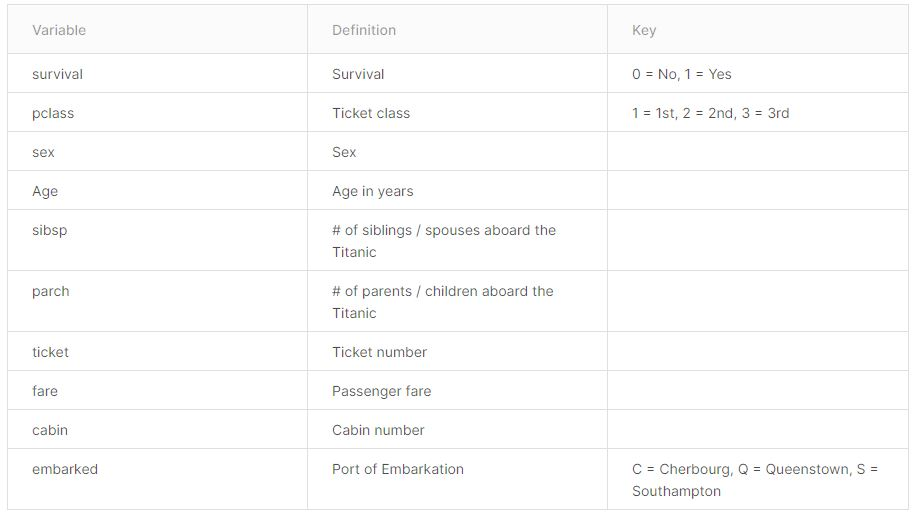

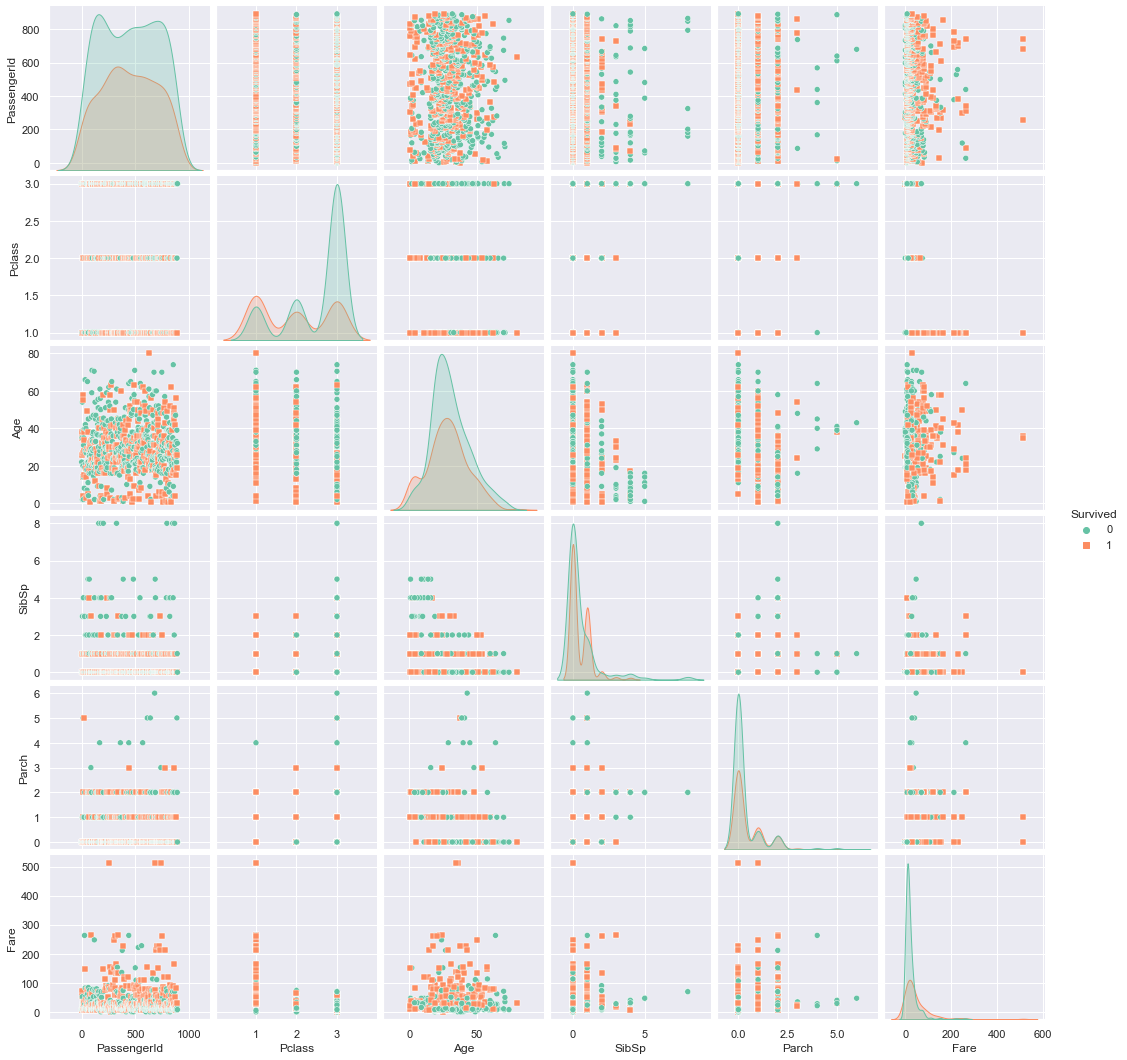

In [6]:
sns.pairplot(training_data, kind="scatter", hue="Survived", markers=["o", "s"], palette="Set2")

### 3.1. Overall survival rate

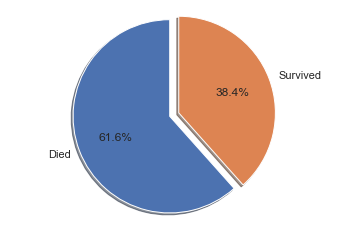

In [7]:
# % of total passengers who survived
survived_rate = (training_data.Survived.sum()/training_data.Survived.count()).round(3)
death_rate = 1-survived_rate

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Died', 'Survived'
sizes = np.array([death_rate, survived_rate])
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

The overall survival rate is a first good indication to keep in mind later, if we are looking for features that are significantly different from the base survival rate.

For all passengers, the survival rate was 38.4%, and the death rate was 61.6%. 

We will now examine if any features seem to influence the rate of survival.

### 3.2. Survival rates by gender

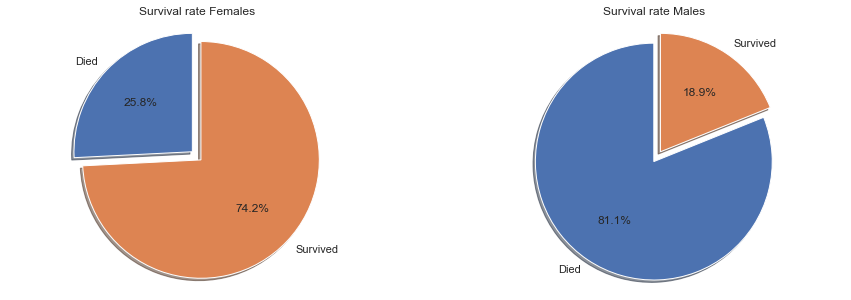

In [8]:
female_survival_rate = (training_data[training_data['Sex']=='female'].Survived.sum()/
                        training_data[training_data['Sex']=='female'].Survived.count()).round(3)
female_death_rate = 1- female_survival_rate

male_survival_rate = (training_data[training_data['Sex']=='male'].Survived.sum()/
                        training_data[training_data['Sex']=='male'].Survived.count()).round(3)
male_death_rate = 1- male_survival_rate

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Died', 'Survived'
female_sizes = np.array([female_death_rate, female_survival_rate])
male_sizes = np.array([male_death_rate, male_survival_rate])
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.pie(female_sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.set_title('Survival rate Females');
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax2.pie(male_sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90);
ax2.set_title('Survival rate Males')
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

There is a significant difference in survival rates by gender, indicating that this would be a useful feature for prediction of survival.

The survival rate for females was 74.2%, far above the overall survival rate of all passengers at 38.4%. For men the direction is flipped. Men only had a survival rate of 18.9%, far below the overall average and significantly lower than women.

### 3.3. Survival rates by age

In [9]:
def q1(x):
    return x.quantile(0.25)

def q3(x):
    return x.quantile(0.75)
training_data.groupby(['Survived']).agg({'Age':['min', q1, 'median', q3, 'max', 'mean', 'std', 'count']}).round(1)

Age                                           
          min    q1 median    q3   max  mean   std count
Survived                                                
0         1.0  21.0   28.0  39.0  74.0  30.6  14.2   424
1         0.4  19.0   28.0  36.0  80.0  28.3  15.0   290

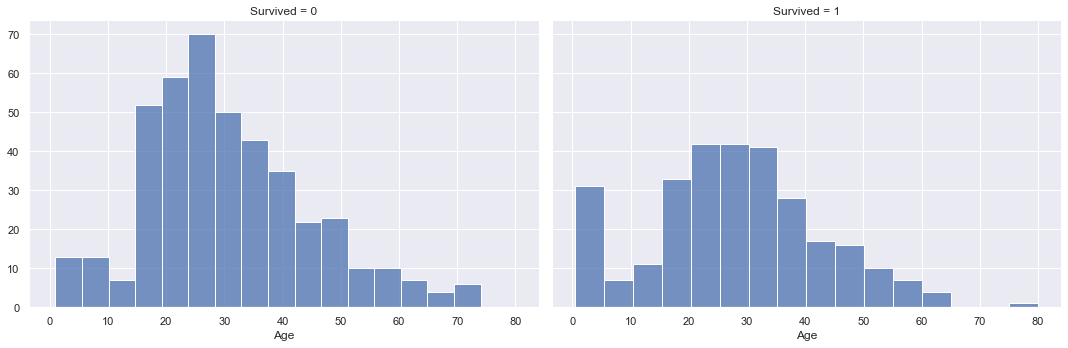

In [10]:
g = sns.FacetGrid(training_data, col="Survived", height=5, aspect=1.5)
g.map(sns.histplot, "Age")

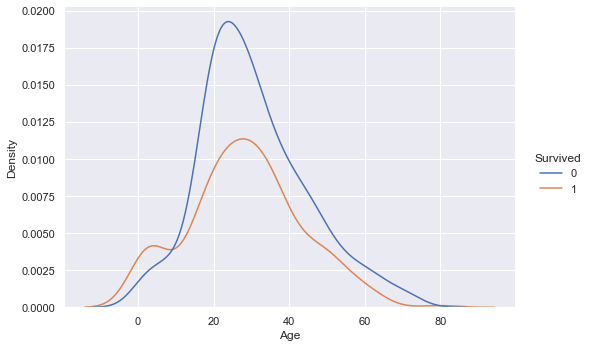

In [11]:
sns.displot(training_data, x ="Age", hue="Survived", kind="kde", height=5, aspect=1.5)

Looking at the age data, there is surprisingly not much indication of a connection to survival. If we look at the two different distributions for survived and not survived, the min, mean, max as well as quartile values are very similar. The overlaying density plots indicate a higher density for survived passengers in the lower age brackets, but otherwise there is not much difference.

In addition the age value unfortunately has a significant amount of missing values with 177 missing values in the training set and 86 missing values in the test set. We will either have to impute these missing values or remove the age variable completely before training our machine learning models.

### 3.4. Survival rates by Fare price and ticket class

In [12]:
training_data.groupby(['Survived']).agg({'Fare':['min', q1, 'median', q3, 'max', 'mean', 'std', 'count']}).round(1)

Fare                                            
          min    q1 median    q3    max  mean   std count
Survived                                                 
0         0.0   7.9   10.5  26.0  263.0  22.1  31.4   549
1         0.0  12.5   26.0  57.0  512.3  48.4  66.6   342

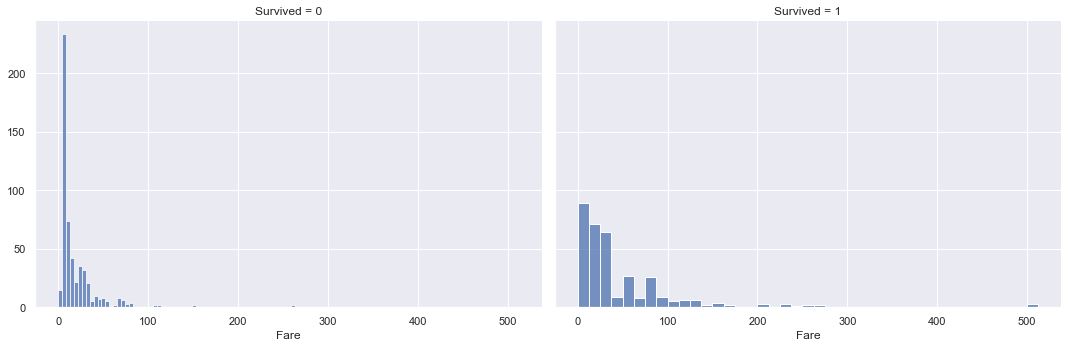

In [13]:
g = sns.FacetGrid(training_data, col="Survived", height=5, aspect=1.5)
g.map(sns.histplot, "Fare")

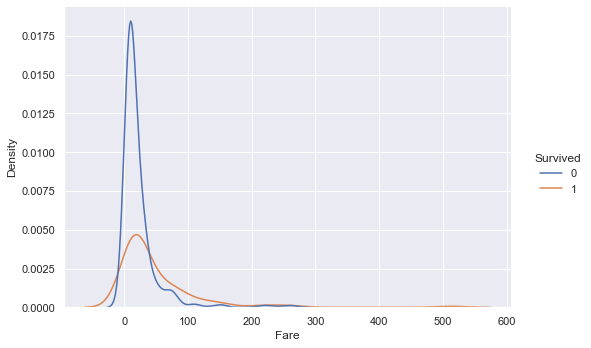

In [14]:
sns.displot(training_data, x ="Fare", hue="Survived", kind="kde", height=5, aspect=1.5)

Looking at the distributions of Fare paid between survived and not survived passengers, there is a big difference in values. The mean and median values of fare paid for survived passengers are more than 2x higher than those for not survived passengers.

The distribution also stretches further out into higher fare values for survived passengers vs. not survived passengers. The density is also higher for survived passengers in the higher fare regions.

These findings indicate that passengers who paid higher fares for their tickets had higher survival rates vs. passengers who paid lower fares.

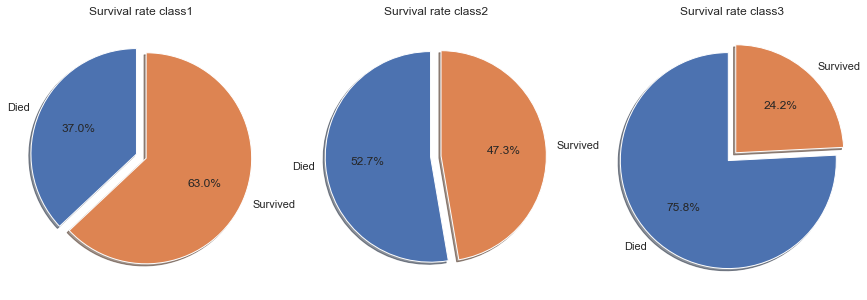

In [15]:
class1_survival_rate = (training_data[training_data['Pclass']==1].Survived.sum()/
                        training_data[training_data['Pclass']==1].Survived.count()).round(3)
class1_death_rate = 1- class1_survival_rate

class2_survival_rate = (training_data[training_data['Pclass']==2].Survived.sum()/
                        training_data[training_data['Pclass']==2].Survived.count()).round(3)
class2_death_rate = 1- class2_survival_rate

class3_survival_rate = (training_data[training_data['Pclass']==3].Survived.sum()/
                        training_data[training_data['Pclass']==3].Survived.count()).round(3)
class3_death_rate = 1- class3_survival_rate

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Died', 'Survived'
class1_sizes = np.array([class1_death_rate, class1_survival_rate])
class2_sizes = np.array([class2_death_rate, class2_survival_rate])
class3_sizes = np.array([class3_death_rate, class3_survival_rate])
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.pie(class1_sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.set_title('Survival rate class1');
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax2.pie(class2_sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90);
ax2.set_title('Survival rate class2')
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax3.pie(class3_sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90);
ax3.set_title('Survival rate class3')
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

The above conclusion that passengers who paid higher fares had higher survival rates than passengers who paid lower fares is confirmed if we look at the survival rates by class. 
Note that Class1 indicates first class, therefore highest paid fares, whereas class 3 is third class with the lowest fares.

The survival rates in the individual classes decline the lower the class.
- First class passengers had a survival rate of 63%, which is significantly higher than the overall average of 38.4%.
- Second class passengers had a survival rate of 47.3%, which is still above the overall average.
- Third class passengers had a survival rate of only 24.2%, well below the average of 38.4%.

### 3.5. Survival rates by # of siblings/spouses aboard the Titanic

In [16]:
training_data.groupby(['Survived']).agg({'SibSp':['min', q1, 'median', q3, 'max', 'mean', 'std', 'count']}).round(1)

SibSp                                 
           min q1 median q3 max mean  std count
Survived                                       
0            0  0      0  1   8  0.6  1.3   549
1            0  0      0  1   4  0.5  0.7   342

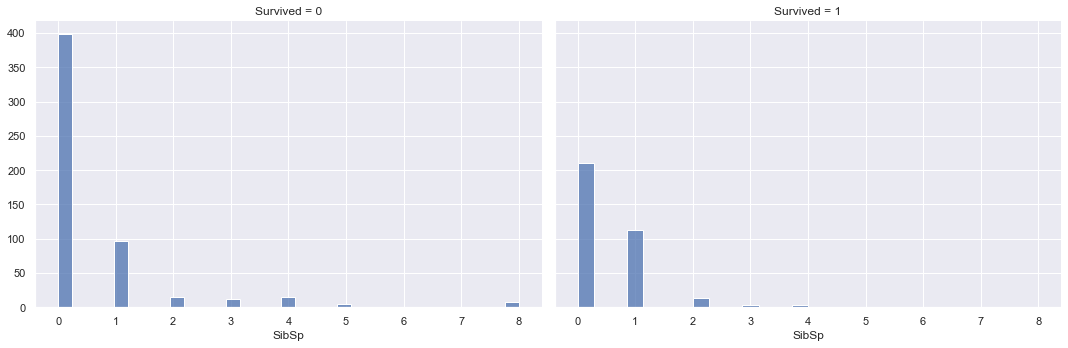

In [17]:
g = sns.FacetGrid(training_data, col="Survived", height=5, aspect=1.5)
g.map(sns.histplot, "SibSp")

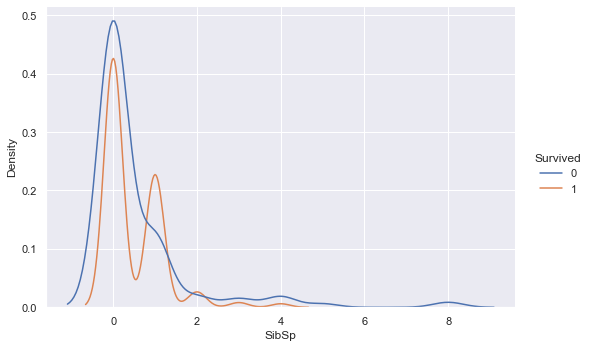

In [18]:
sns.displot(training_data, x ="SibSp", hue="Survived", kind="kde", height=5, aspect=1.5)

The overlaying densities and summary statistics of the number of siblings/spouses distribution by survived vs. not survived show little difference. 
The density function for survived is slightly higher than not survived around 1 sibling/spouse, but drops below the not survived density thereafter.

### 3.6. Survival rates by # of parents/children aboard the Titanic

In [19]:
training_data.groupby(['Survived']).agg({'Parch':['min', q1, 'median', q3, 'max', 'mean', 'std', 'count']}).round(1)

Parch                                 
           min q1 median q3 max mean  std count
Survived                                       
0            0  0      0  0   6  0.3  0.8   549
1            0  0      0  1   5  0.5  0.8   342

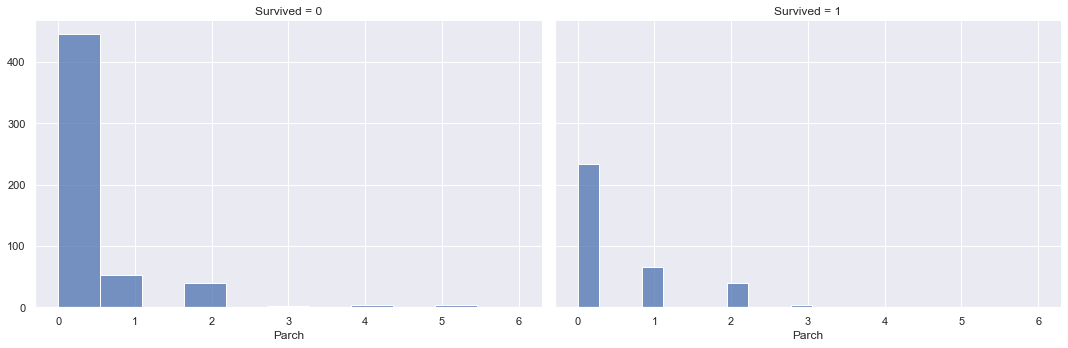

In [20]:
g = sns.FacetGrid(training_data, col="Survived", height=5, aspect=1.5)
g.map(sns.histplot, "Parch")

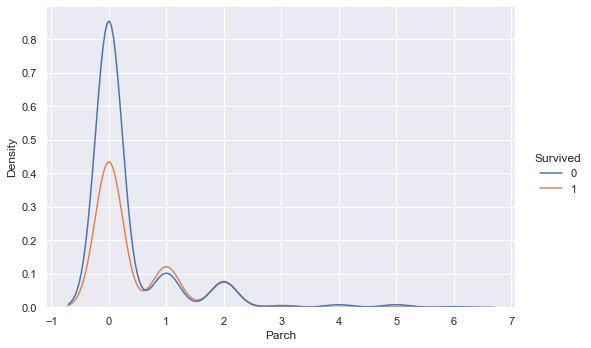

In [21]:
sns.displot(training_data, x ="Parch", hue="Survived", kind="kde", height=5, aspect=1.5)

The overlaying densities and summary statistics of the number of parents/children distribution by survived vs. not survived show a higher density of not surviving for low numbers of parent/children on board, however the densities are similar for higher values of parents/children on board. This indicates that the more parents/children a passenger had on board, the likelihood of surviving vs. not surviving increases.

## 4. Prepare the data for Machine Learning algorithms

Before training our machine learning models, we will first pre-process the training data.

We will do two pre-processing steps. For numerical features, we will use the standard scaler to transform the variables to have a mean of 0 and a standard deviation of 1. This ensures that all features are in a similar range, which is necessary for some algorithms such as K-means and SVMs, which rely on Euclidean Distance calculations. If the features were not on similar scales in similar ranges, the unit measurement would influence the calculations, which is not desired as unit measurements are arbitrary. The standard scaler is trained on the training data, and used to transform both the training and the testing data.

For categorical features, we will have to transform these to numerical features, so that they can be used to train our models. For this we will use the OneHot encoder, which transforms the categories from text into zeros and ones, with one indicating the category is present.


In [22]:
#split numeric and categorical variables
X_train_numeric = training_data[["SibSp", "Parch", "Fare"]]
X_train_categorical = training_data[["Pclass", "Sex"]]
Y_train = training_data[["Survived"]]

X_test_numeric = testing_data[["SibSp", "Parch", "Fare"]]
X_test_categorical = testing_data[["Pclass", "Sex"]]

In [23]:
from sklearn import preprocessing

#fit standard scaler to training set
scaler = preprocessing.StandardScaler().fit(X_train_numeric)

#transform training set
X_train_numeric_scaled = pd.DataFrame(scaler.transform(X_train_numeric), columns = X_train_numeric.columns)

#transform test set
X_test_numeric_scaled = pd.DataFrame(scaler.transform(X_test_numeric), columns = X_test_numeric.columns)

In [24]:
from sklearn.preprocessing import OneHotEncoder

#fit one hot encoder to training set
one_hot = OneHotEncoder(handle_unknown='ignore').fit(X_train_categorical)

#transform training set
X_train_categorical_one_hot = pd.DataFrame(one_hot.transform(X_train_categorical).toarray())
X_train_categorical_one_hot.columns = one_hot.get_feature_names(X_train_categorical.columns)

#transform test set
X_test_categorical_one_hot = pd.DataFrame(one_hot.transform(X_test_categorical).toarray())
X_test_categorical_one_hot.columns = one_hot.get_feature_names(X_test_categorical.columns)

In [25]:
#cobine pre-processed numeric and categorical variables

#training set
X_train = X_train_numeric_scaled.merge(X_train_categorical_one_hot, how='outer', left_index=True, right_index=True)

#test set
X_test = X_test_numeric_scaled.merge(X_test_categorical_one_hot, how='outer', left_index=True, right_index=True)

In [26]:
X_train.isna().sum().sum(), X_test.isna().sum().sum()

(0, 1)

In [27]:
from sklearn.impute import SimpleImputer

#fit imputer to training set
imp = SimpleImputer(missing_values=np.nan, strategy='median').fit(X_train)

#inpute missing value in test set
X_test = pd.DataFrame(imp.transform(X_test), columns = X_test.columns)

In [28]:
X_train.isna().sum().sum(), X_test.isna().sum().sum()

(0, 0)

In [29]:
X_train.head(3)

,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,0.432793,-0.473674,-0.502445,0.0,0.0,1.0,0.0,1.0
1,0.432793,-0.473674,0.786845,1.0,0.0,0.0,1.0,0.0
2,-0.474545,-0.473674,-0.488854,0.0,0.0,1.0,1.0,0.0


In [30]:
X_test.head(3)

,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,-0.474545,-0.473674,-0.490783,0.0,0.0,1.0,0.0,1.0
1,0.432793,-0.473674,-0.507479,0.0,0.0,1.0,1.0,0.0
2,-0.474545,-0.473674,-0.453367,0.0,1.0,0.0,0.0,1.0


### 5. Select, train and fine-tune models

Now it's finally time to train our machine learning models.
As this is a classification task, we will take into considering below models.
1. Naive Bayes
2. LDA
3. Logistic Regression
4. KNN
5. SVM linear
6. SVM Gaussian
7. Decision Tree
8. Random Forrest
9. Ensemble of models 1-8

As we have no labels on the testing data, we will use the training data with 5 fold cross validation, to get an estimation of the out of sample accuracy. The model with the highest mean accuracy on all cross validation sets will be selected for prediction and submission to kaggle.

In [36]:
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy = 'most_frequent')
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, Y_train)
y_dummy_predictions = pd.DataFrame(dummy_majority.predict(X_train))

from sklearn.model_selection import cross_val_score
clf_cross_val_score = cross_val_score(clf, X_train, Y_train, cv=5).mean().round(3)
clf_cross_val_score

0.616

In [37]:
from sklearn.naive_bayes import GaussianNB

clf1 = GaussianNB()
clf1_cross_val_score = cross_val_score(clf1, X_train, Y_train.values.ravel(), cv=5).mean().round(3)
clf1_cross_val_score

0.789

In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf2 = LinearDiscriminantAnalysis()
clf2_cross_val_score = cross_val_score(clf2, X_train, Y_train.values.ravel(), cv=5).mean().round(3)
clf2_cross_val_score

0.789

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

clf3 = LogisticRegression()
grid_values = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# default metric to optimize over grid parameters: accuracy
grid_clf3 = GridSearchCV(clf3, param_grid = grid_values, cv=5)
grid_clf3.fit(X_train, Y_train.values.ravel());

print('Grid best parameter (max. accuracy): ', grid_clf3.best_params_)
print('Grid best score (accuracy): ', grid_clf3.best_score_.round(3))

Grid best parameter (max. accuracy):  {'C': 0.1}
Grid best score (accuracy):  0.795


In [40]:
from sklearn.neighbors import KNeighborsClassifier

clf4 = KNeighborsClassifier()
grid_values = {'n_neighbors': [1, 3, 5, 7, 9]}

# default metric to optimize over grid parameters: accuracy
grid_clf4 = GridSearchCV(clf4, param_grid = grid_values, cv=5)
grid_clf4.fit(X_train, Y_train.values.ravel());

print('Grid best parameter (max. accuracy): ', grid_clf4.best_params_)
print('Grid best score (accuracy): ', grid_clf4.best_score_.round(3))

Grid best parameter (max. accuracy):  {'n_neighbors': 5}
Grid best score (accuracy):  0.783


In [41]:
from sklearn.svm import SVC

clf5 = SVC(kernel='linear')
grid_values = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# default metric to optimize over grid parameters: accuracy
grid_clf5 = GridSearchCV(clf5, param_grid = grid_values, cv=5)
grid_clf5.fit(X_train, Y_train.values.ravel());

print('Grid best parameter (max. accuracy): ', grid_clf5.best_params_)
print('Grid best score (accuracy): ', grid_clf5.best_score_.round(3))

Grid best parameter (max. accuracy):  {'C': 0.1}
Grid best score (accuracy):  0.787


In [42]:
clf6 = SVC(kernel='rbf')
grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# default metric to optimize over grid parameters: accuracy
grid_clf6 = GridSearchCV(clf6, param_grid = grid_values, cv=5)
grid_clf6.fit(X_train, Y_train.values.ravel())

print('Grid best parameter (max. accuracy): ', grid_clf6.best_params_)
print('Grid best score (accuracy): ', grid_clf6.best_score_.round(3))

Grid best parameter (max. accuracy):  {'C': 1, 'gamma': 0.1}
Grid best score (accuracy):  0.809


In [43]:
from sklearn.tree import DecisionTreeClassifier

clf7 = DecisionTreeClassifier()
grid_values = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

# default metric to optimize over grid parameters: accuracy
grid_clf7 = GridSearchCV(clf7, param_grid = grid_values, cv=5)
grid_clf7.fit(X_train, Y_train.values.ravel())

print('Grid best parameter (max. accuracy): ', grid_clf7.best_params_)
print('Grid best score (accuracy): ', grid_clf7.best_score_.round(3))

Grid best parameter (max. accuracy):  {'max_depth': 9}
Grid best score (accuracy):  0.807


In [44]:
from sklearn.ensemble import RandomForestClassifier

clf8 = RandomForestClassifier()
grid_values = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'n_estimators': [10, 25, 50, 75, 100, 150, 200, 250, 300]}

# default metric to optimize over grid parameters: accuracy
grid_clf8 = GridSearchCV(clf8, param_grid = grid_values, cv=5)
grid_clf8.fit(X_train, Y_train.values.ravel())

print('Grid best parameter (max. accuracy): ', grid_clf8.best_params_)
print('Grid best score (accuracy): ', grid_clf8.best_score_.round(3))

Grid best parameter (max. accuracy):  {'max_depth': 8, 'n_estimators': 250}
Grid best score (accuracy):  0.815


In [48]:
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier(estimators=[('GNB', clf1), ('LDA', clf2), ('lr', clf3), 
                                     ('KNN', clf4), ('SVC_linear', clf5), ('SVC_rfb', clf6), ('tree', clf7), ('rf', clf8)],
                         voting='hard')
    
eclf_cross_val_score = cross_val_score(eclf, X_train, Y_train.values.ravel(), cv=5).mean().round(3)
eclf_cross_val_score

0.808

### 6. Conclusion

Based on the average cross validation error from five-fold cross validation, we get the below accuracies for each model

In [73]:
classifiers = ['GaussianNB', 
               'LinearDiscriminantAnalysis', 
               'LogisticRegression', 
               'KNeighborsClassifier', 
               'SVC_Linear', 
               'SVC_rbf', 
               'DecisionTreeClassifier', 
               'RandomForestClassifier', 
               'VotingClassifier']

scores = [clf1_cross_val_score, 
          clf2_cross_val_score, 
          grid_clf3.best_score_.round(3), 
          grid_clf4.best_score_.round(3), 
          grid_clf5.best_score_.round(3), 
          grid_clf6.best_score_.round(3), 
          grid_clf7.best_score_.round(3), 
          grid_clf8.best_score_.round(3),
         eclf_cross_val_score]

model_scores = pd.DataFrame(data= scores, columns = ['CV_Accuracy'], index = classifiers)
model_scores

,CV_Accuracy
GaussianNB,0.789
LinearDiscriminantAnalysis,0.789
LogisticRegression,0.795
KNeighborsClassifier,0.783
SVC_Linear,0.787
SVC_rbf,0.809
DecisionTreeClassifier,0.807
RandomForestClassifier,0.815
VotingClassifier,0.808


Based on the highest cross validation accuracy of 81.5%, we will use the random forest classifier to submit our predictions to Kaggle.

In [74]:
predictions = grid_clf8.predict(X_test)

output = pd.DataFrame({'PassengerId': testing_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
